In [2]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, log_loss
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import arabic_reshaper
from bidi.algorithm import get_display

In [4]:
# Load the dataset (ensure you have a CSV or a dataframe with sentences and categories)
# Assuming the dataset has columns 'sentence' and 'category'
# For this example, you will replace the path with your own dataset file path
data = pd.read_csv('Final_collected_data/merged_dhia.csv', sep=',', encoding='utf-8')

In [5]:
# Display the first few rows of the dataset to understand its structure
data.head()

,Line,Category,processed_quotes
0,اصبر قليلاً فبعد العسر تيسير وكلّ أمرٍ له وق...,الصبر,"['صبر', 'قلل', 'بعد', 'عسر', 'يسر', 'وكل', 'أم..."
1,الأمور التي تعرفها تعادل في حجمها حفنة الرمل...,التواضع,"['امر', 'عرف', 'عدل', 'حجم', 'حفن', 'رمل', 'يد..."
2,البشر لن يجدوا أبر بهم ولا احنى عليهم من الل...,الرحمة,"['بشر', 'يجد', 'أبر', 'احن', 'علي', 'الل', 'عز..."
3,الحسد أغبى الرذائل إطلاقا فإنه لا يعود على ص...,الحسد,"['حسد', 'اغب', 'رذيل', 'طلق', 'فإن', 'يعد', 'ع..."
4,الصّبر أفضل علاج للحزن. ( بلوطس ),الصبر,"['صبر', 'فضل', 'علج', 'حزن', 'وطس']"


In [6]:
data.describe()

,Line,Category,processed_quotes
count,23382,23382,23382
unique,23382,135,20253
top,اصبر قليلاً فبعد العسر تيسير وكلّ أمرٍ له وق...,الصبر,['ـ']
freq,1,905,21


In [7]:
# Split the data into features (X) and target (y)
X = data['processed_quotes']
y = data['Category']

In [24]:
# Filter out categories with less than 2 occurrences
category_counts = data['Category'].value_counts()
filtered_data = data[data['Category'].isin(category_counts[category_counts >= 50].index)]

# Update X and y with the filtered data
X = filtered_data['Line']
y = filtered_data['Category']

# Display the value counts of the filtered categories
filtered_data['Category'].value_counts()

Category
الصبر                        905
الرحمة                       746
الشجاعة                      637
التودد                       616
التغافل                      576
الرفق                        520
الإعراض عن الجاهلين          516
الظلم                        482
البر                         465
الصدق                        463
التضحية                      459
حفظ اللسان                   454
الطمع                        433
الاعتدال والوسطية            418
الوفاء                       412
النفاق                       394
الكذب                        376
الشكر                        367
القناعة                      358
الغيرة                       358
الحسد                        352
التثبت                       349
التأني الأناة                347
الغش                         339
الحياء                       322
البطر                        313
التواضع                      310
السماحة                      308
الصمت                        306
السكينة الستر                299
ا

In [25]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [26]:
# Convert the sentences into numerical format using TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features based on dataset size
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [27]:
# Train a Logistic Regression model
svm_model = SVC(C=1)
svm_model.fit(X_train_tfidf, y_train)

SVC(C=1)

In [28]:
# Predict the categories on the test set
y_pred = svm_model.predict(X_test_tfidf)

In [29]:
from sklearn.metrics import root_mean_squared_error

In [31]:
# Alternative: Display the classification report as a DataFrame for better readability
report = classification_report(y_test, y_pred, output_dict=True)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
report_df = pd.DataFrame(report).transpose()
print("Classification Report:")
print(report_df)
# Calculate and display additional classification metrics
accuracy = svm_model.score(X_test_tfidf, y_test)
print(f"Accuracy: {accuracy}")


Classification Report:
                           precision    recall  f1-score      support
إفشاء السر                  0.684211  0.650000  0.666667    20.000000
الأخوة والصداقة             0.769231  0.400000  0.526316    25.000000
الأمانة                     0.825000  0.970588  0.891892    34.000000
الإخلاص                     0.615385  0.333333  0.432432    24.000000
الإصلاح                     1.000000  1.000000  1.000000    12.000000
الإعراض عن الجاهلين         1.000000  1.000000  1.000000   103.000000
الإنصات                     1.000000  0.500000  0.666667    10.000000
الإيثار                     1.000000  0.763158  0.865672    38.000000
الاحترام                    0.892857  0.675676  0.769231    37.000000
الاعتدال والوسطية           1.000000  1.000000  1.000000    84.000000
الانتقام                    0.925926  0.961538  0.943396    26.000000
البخل                       0.800000  0.428571  0.558140    28.000000
البر                        0.975309  0.849462  0.908046    93.0000

In [15]:
from matplotlib import font_manager

In [16]:
font_path = '../../arabic font/dejavu-sans/ttf/DejaVuSans.ttf'  # Adjust this for your system
font_prop = font_manager.FontProperties(fname=font_path)

In [17]:
# Confusion Matrix with Arabic labels
conf_matrix = confusion_matrix(y_test, y_pred)

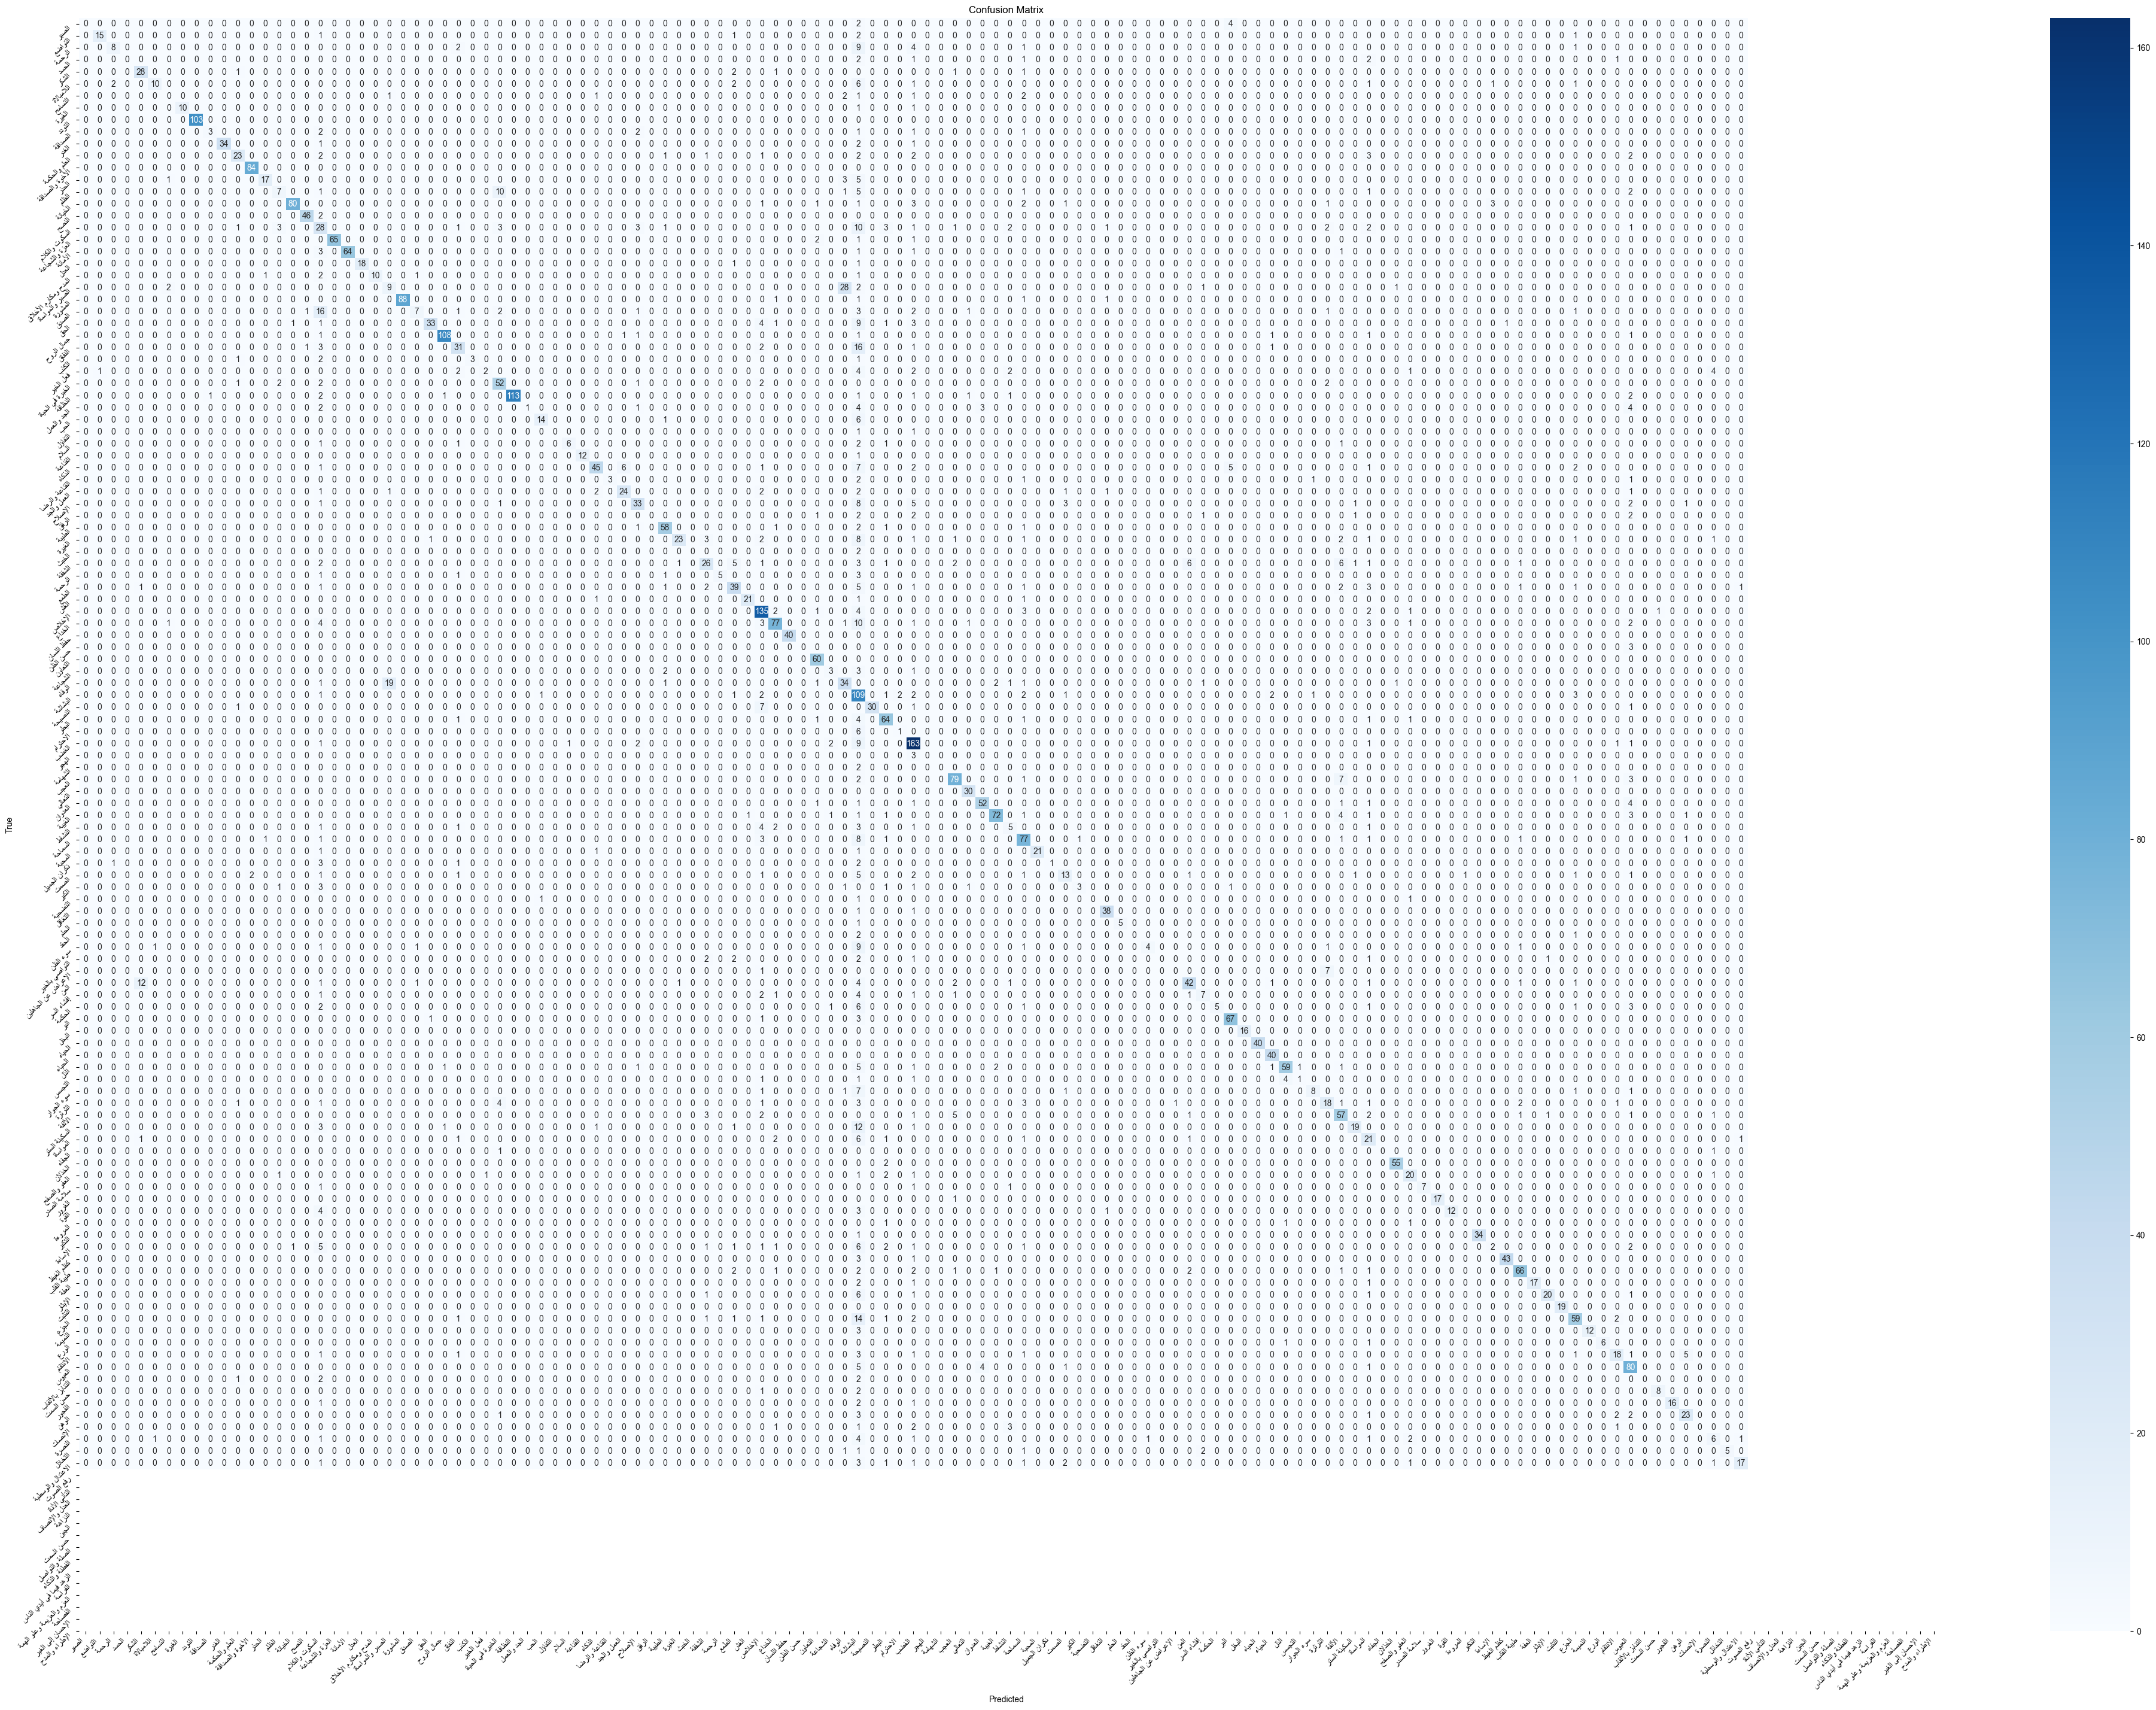

In [ ]:
plt.rcParams['font.family'] = 'Arial'  # Set the font to DejaVu Sans

plt.figure(figsize=(50, 35))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=[get_display(arabic_reshaper.reshape(label)) for label in data['Category'].unique()], 
            yticklabels=[get_display(arabic_reshaper.reshape(label)) for label in data['Category'].unique()])

# Set Arabic font for the labels
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, va='top')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [19]:
# Save the model and vectorizer for later use
import joblib

In [ ]:
joblib.dump(svm_model, 'decision_tree_model.pkl')
joblib.dump(tfidf_vectorizer, 'decision_tree_model_tfidf_vectorizer.pkl')

['decision_tree_model_tfidf_vectorizer.pkl']

In [21]:
# Example prediction
example_sentence = ["أحيانًا تزداد عندما نرى الآخرين يحققون ما نرغب في الوصول إليه"]
example_tfidf = tfidf_vectorizer.transform(example_sentence)
predicted_category = svm_model.predict(example_tfidf)
print(f"Predicted Category: {predicted_category[0]}")

Predicted Category: الغيرة
